In [253]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [254]:
df = pd.read_csv("final_complete_hourly_data_2016_2019.csv")

In [255]:
df['date']=pd.to_datetime(df['date'])
df.set_index('date',inplace=True)

In [256]:
df.index

DatetimeIndex(['2016-01-01 00:00:00', '2016-01-01 01:00:00',
               '2016-01-01 02:00:00', '2016-01-01 03:00:00',
               '2016-01-01 04:00:00', '2016-01-01 05:00:00',
               '2016-01-01 06:00:00', '2016-01-01 07:00:00',
               '2016-01-01 08:00:00', '2016-01-01 09:00:00',
               ...
               '2021-02-04 14:00:00', '2021-02-04 15:00:00',
               '2021-02-04 16:00:00', '2021-02-04 17:00:00',
               '2021-02-04 18:00:00', '2021-02-04 19:00:00',
               '2021-02-04 20:00:00', '2021-02-04 21:00:00',
               '2021-02-04 22:00:00', '2021-02-04 23:00:00'],
              dtype='datetime64[ns]', name='date', length=44688, freq=None)

In [257]:
daily = df.groupby(df.index.date).agg({'blizzard':'max'})

In [258]:
daily

,blizzard
2016-01-01,0
2016-01-02,0
2016-01-03,0
2016-01-04,0
2016-01-05,0
...,...
2021-01-31,0
2021-02-01,0
2021-02-02,0
2021-02-03,0


In [260]:
daily.index = daily.index.astype('datetime64[ns]')

In [262]:
monthly = daily.groupby(daily.index.month).agg({'blizzard':'sum'})

In [263]:
daily

,blizzard
2016-01-01,0
2016-01-02,0
2016-01-03,0
2016-01-04,0
2016-01-05,0
...,...
2021-01-31,0
2021-02-01,0
2021-02-02,0
2021-02-03,0


In [264]:
monthly['blizzard'].sum()

75

In [265]:
monthly

,blizzard
1,1
2,5
3,0
4,1
5,14
6,3
7,9
8,18
9,9
10,11


In [266]:
daily[daily['blizzard']==1]

,blizzard
2016-07-20,1
2016-08-01,1
2016-08-05,1
2016-08-26,1
2016-10-10,1
...,...
2020-09-24,1
2020-10-17,1
2020-10-18,1
2020-10-22,1


In [267]:
monthly

,blizzard
1,1
2,5
3,0
4,1
5,14
6,3
7,9
8,18
9,9
10,11


<AxesSubplot:>

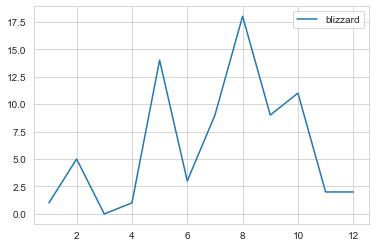

In [268]:
monthly.plot()

In [269]:
months={
            "1":"Jan","2":"Feb","3":"Mar","4":"Apr","5":"May","6":"Jun",
            "7":"Jul","8":"Aug","9":"Sept","10":"Oct","11":"Nov","12":"Dec"
            }
d=[]

In [270]:
for i in range(0,len(monthly)):

    month=str(monthly.index[i])
    

    d.append(months[month])

d=np.array(d)

In [271]:
def convert_string(string):
    months={
            "01":"Jan","02":"Feb","03":"Mar","04":"Apr","05":"May","06":"Jun",
            "07":"Jul","08":"Aug","09":"Sept","10":"Oct","11":"Nov","12":"Dec"
            }
    list_o = string.split("-")
    list_n = []
    list_n.append(list_o[0])
    list_n.append(months[list_o[1]])
    list_n.append(list_o[2])
    
    return str(list_n[0]+'-'+ list_n[1]+'-'+list_n[2])


In [272]:
start_date = str(daily.index[0])
end_date = str(daily.index[-1])
starting = start_date.split(' ')[0]
ending = end_date.split(' ')[0]

In [273]:
startingdate = convert_string(starting)
endingdate = convert_string(ending)

In [274]:
d

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept',
       'Oct', 'Nov', 'Dec'], dtype='<U4')

In [275]:
data = np.array(range(0,20,1))

In [276]:
data

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [277]:
import seaborn as sns

Text(0.5, 1.0, '\n Monthly Frequency of Blizzard\n Data Duration:2016-Jan-01 to 2021-Feb-04')

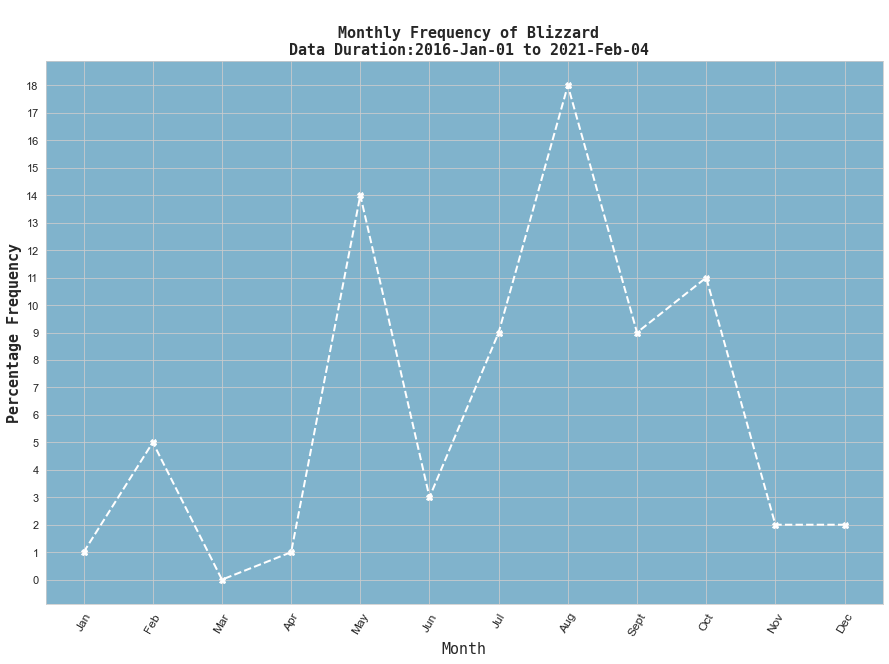

In [278]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,10))

plt.gca().set_facecolor((0.5, 0.7, 0.8))

plt.xticks(ticks=np.array(range(1,len(d)+1,1)),labels=d,rotation=60,fontsize=12)
plt.yticks(data,fontsize=11)
plt.plot(monthly,c='w',marker="X",label='',linewidth=2,linestyle='--')
plt.ylabel('Percentage Frequency',family='monospace',fontsize=15,fontweight='bold')
plt.xlabel('Month',family='monospace',fontsize=15)
plt.title('\n Monthly Frequency of Blizzard'+'\n Data Duration:'+ startingdate +" to "+ endingdate
            ,fontsize=15,fontweight='bold',family='monospace')

In [279]:
blizzard_indices= df[df['blizzard']==1].index

In [280]:
blizzard_indices

DatetimeIndex(['2016-07-20 09:00:00', '2016-07-20 10:00:00',
               '2016-07-20 11:00:00', '2016-07-20 12:00:00',
               '2016-07-20 13:00:00', '2016-07-20 14:00:00',
               '2016-07-20 15:00:00', '2016-07-20 16:00:00',
               '2016-07-20 17:00:00', '2016-08-01 00:00:00',
               ...
               '2020-10-22 17:00:00', '2020-10-22 18:00:00',
               '2020-10-22 19:00:00', '2020-10-22 20:00:00',
               '2020-10-22 21:00:00', '2020-10-22 22:00:00',
               '2020-10-22 23:00:00', '2020-10-23 00:00:00',
               '2020-10-23 01:00:00', '2020-10-23 02:00:00'],
              dtype='datetime64[ns]', name='date', length=852, freq=None)

In [281]:
blizzard_dates = df[df['blizzard']==1].groupby(df[df['blizzard']==1].index.date).agg({'blizzard':'max'}).index

In [282]:
blizzard_dates = blizzard_dates.astype(str)

In [283]:
blizzard_dates

Index(['2016-07-20', '2016-08-01', '2016-08-05', '2016-08-26', '2016-10-10',
       '2016-10-11', '2016-10-12', '2016-10-13', '2016-10-14', '2016-10-28',
       '2016-10-29', '2017-04-30', '2017-05-01', '2017-05-15', '2017-05-16',
       '2017-05-20', '2017-05-22', '2017-05-23', '2017-05-25', '2017-05-26',
       '2017-05-27', '2017-05-28', '2017-07-17', '2017-07-18', '2017-07-19',
       '2017-07-22', '2017-07-23', '2017-08-09', '2017-08-10', '2017-08-13',
       '2017-08-14', '2017-08-15', '2017-09-23', '2017-09-24', '2017-12-16',
       '2017-12-17', '2018-05-08', '2018-08-09', '2018-08-10', '2018-08-27',
       '2018-08-30', '2018-08-31', '2018-11-05', '2018-11-06', '2019-01-09',
       '2019-02-06', '2019-06-09', '2019-06-21', '2019-06-27', '2019-07-01',
       '2019-09-18', '2019-09-19', '2020-02-01', '2020-02-02', '2020-02-28',
       '2020-02-29', '2020-05-11', '2020-05-12', '2020-05-21', '2020-07-16',
       '2020-07-17', '2020-08-01', '2020-08-02', '2020-08-17', '2020-08-18',

In [284]:
d1 = {new_list :[] for new_list  in blizzard_dates}

In [285]:
d1

{'2016-07-20': [],
 '2016-08-01': [],
 '2016-08-05': [],
 '2016-08-26': [],
 '2016-10-10': [],
 '2016-10-11': [],
 '2016-10-12': [],
 '2016-10-13': [],
 '2016-10-14': [],
 '2016-10-28': [],
 '2016-10-29': [],
 '2017-04-30': [],
 '2017-05-01': [],
 '2017-05-15': [],
 '2017-05-16': [],
 '2017-05-20': [],
 '2017-05-22': [],
 '2017-05-23': [],
 '2017-05-25': [],
 '2017-05-26': [],
 '2017-05-27': [],
 '2017-05-28': [],
 '2017-07-17': [],
 '2017-07-18': [],
 '2017-07-19': [],
 '2017-07-22': [],
 '2017-07-23': [],
 '2017-08-09': [],
 '2017-08-10': [],
 '2017-08-13': [],
 '2017-08-14': [],
 '2017-08-15': [],
 '2017-09-23': [],
 '2017-09-24': [],
 '2017-12-16': [],
 '2017-12-17': [],
 '2018-05-08': [],
 '2018-08-09': [],
 '2018-08-10': [],
 '2018-08-27': [],
 '2018-08-30': [],
 '2018-08-31': [],
 '2018-11-05': [],
 '2018-11-06': [],
 '2019-01-09': [],
 '2019-02-06': [],
 '2019-06-09': [],
 '2019-06-21': [],
 '2019-06-27': [],
 '2019-07-01': [],
 '2019-09-18': [],
 '2019-09-19': [],
 '2020-02-01

In [286]:
for index in blizzard_indices:
    index = str(index)
    new = []
    new = index.split(" ")
    d1[new[0]].append(new[1])

In [287]:
df[df['blizzard']==1].head(48)

,tempr,ap,ws,rh,blizzard
date,,,,,
2016-07-20 09:00:00,-8.97,972.73,30.95,85.22,1
2016-07-20 10:00:00,-8.47,970.38,33.38,88.41,1
2016-07-20 11:00:00,-7.74,968.73,31.82,89.66,1
2016-07-20 12:00:00,-7.21,966.83,37.34,90.34,1
2016-07-20 13:00:00,-7.29,966.71,29.49,90.36,1
2016-07-20 14:00:00,-7.46,966.53,26.49,90.18,1
2016-07-20 15:00:00,-7.60,966.02,33.82,90.08,1
2016-07-20 16:00:00,-7.50,966.12,28.61,90.19,1
2016-07-20 17:00:00,-7.32,966.47,20.65,90.39,1


In [288]:
d1

{'2016-07-20': ['09:00:00',
  '10:00:00',
  '11:00:00',
  '12:00:00',
  '13:00:00',
  '14:00:00',
  '15:00:00',
  '16:00:00',
  '17:00:00'],
 '2016-08-01': ['00:00:00',
  '01:00:00',
  '02:00:00',
  '03:00:00',
  '04:00:00',
  '05:00:00'],
 '2016-08-05': ['03:00:00',
  '04:00:00',
  '05:00:00',
  '06:00:00',
  '07:00:00',
  '08:00:00',
  '09:00:00'],
 '2016-08-26': ['05:00:00',
  '06:00:00',
  '07:00:00',
  '08:00:00',
  '09:00:00',
  '10:00:00',
  '11:00:00',
  '12:00:00',
  '13:00:00',
  '14:00:00',
  '15:00:00',
  '16:00:00',
  '17:00:00',
  '18:00:00',
  '19:00:00',
  '20:00:00'],
 '2016-10-10': ['19:00:00', '20:00:00', '21:00:00', '22:00:00', '23:00:00'],
 '2016-10-11': ['00:00:00',
  '01:00:00',
  '02:00:00',
  '03:00:00',
  '04:00:00',
  '05:00:00',
  '06:00:00',
  '07:00:00',
  '08:00:00',
  '09:00:00',
  '10:00:00',
  '11:00:00',
  '12:00:00',
  '13:00:00',
  '14:00:00',
  '15:00:00',
  '16:00:00',
  '17:00:00',
  '18:00:00',
  '19:00:00',
  '20:00:00'],
 '2016-10-12': ['23:00

In [289]:
import re

In [290]:
MONTHS ={
            "Jan":"-[0][1]-","Feb":"-[0][2]-","Mar":"-[0][3]-","Apr":"-[0][4]-","May":"-[0][5]-","Jun":"-[0][6]-",
            "Jul":"-[0][7]-","Aug":"-[0][8]-","Sept":"-[0][9]-","Oct":"-[1][0]-","Nov":"-[1][1]-","Dec":"-[1][2]-"
            }

In [305]:
month_for = 'Jun'

In [306]:
list1 = []
for key in d1.keys():
    if re.search(MONTHS[month_for],key):
        list1.append(key)
print((list1))

['2019-06-09', '2019-06-21', '2019-06-27']


In [307]:
date = list1[2]

In [308]:
time_stamps = d1.get(date)


In [309]:
time_stamps

['04:00:00',
 '05:00:00',
 '06:00:00',
 '07:00:00',
 '08:00:00',
 '09:00:00',
 '10:00:00',
 '11:00:00',
 '12:00:00',
 '13:00:00',
 '14:00:00',
 '15:00:00']

In [310]:
startindex = len(df.loc[:date+' '+time_stamps[0]])
endindex = len(df.loc[:date+' '+time_stamps[-1]])

In [311]:
analysis = df.iloc[int(startindex)-12:int(endindex)+12]

In [312]:
analysis

,tempr,ap,ws,rh,blizzard
date,,,,,
2019-06-26 17:00:00,-10.06,977.55,9.54,59.50,0
2019-06-26 18:00:00,-8.45,976.65,15.74,63.92,0
2019-06-26 19:00:00,-8.20,975.55,16.74,59.77,0
2019-06-26 20:00:00,-7.88,974.68,18.55,54.63,0
2019-06-26 21:00:00,-7.94,973.54,21.27,61.62,0
2019-06-26 22:00:00,-8.18,973.26,23.04,49.33,0
2019-06-26 23:00:00,-8.13,971.78,23.30,47.95,0
2019-06-27 00:00:00,-7.43,970.53,20.92,47.27,0
2019-06-27 01:00:00,-7.29,969.79,21.12,45.78,0


In [313]:
variables = ['tempr','ap','ws','rh']

In [318]:
variabledict= {'tempr':'Temperature','ap':'Air Pressure','ws':'Wind Speed','rh':'Relative Humidity'}

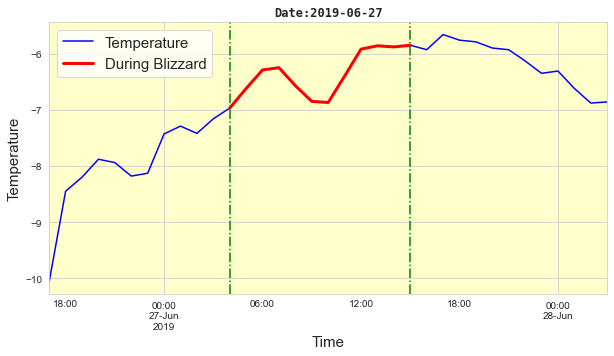

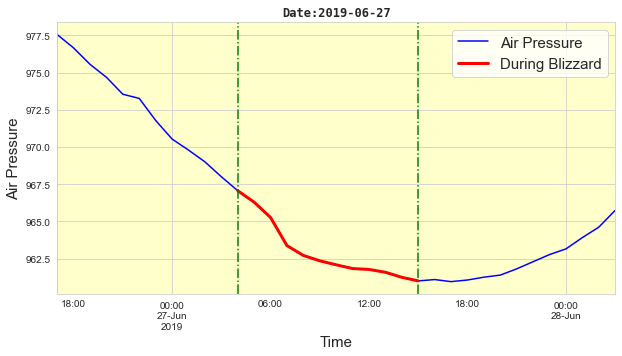

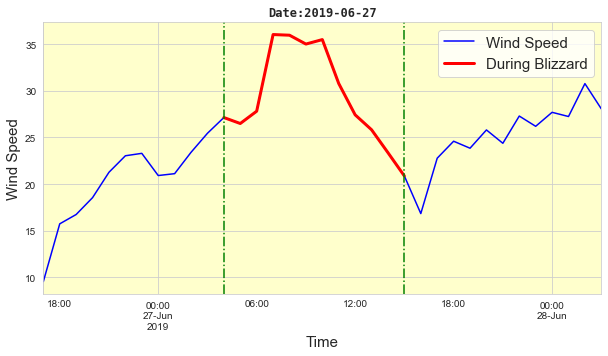

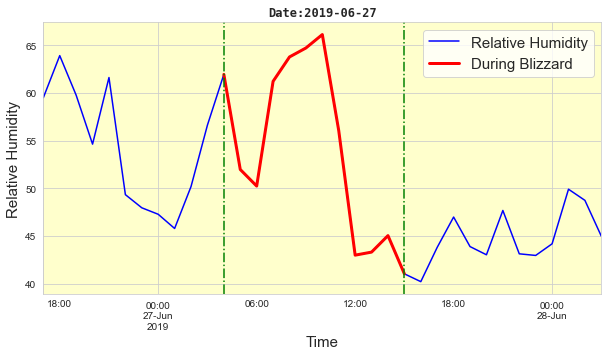

In [324]:
for i in variables:
    plt.figure(figsize=(10,5))
    plt.gca().grid(True)
    plt.gca().set_facecolor((1, 1, 0.8))
    analysis[i].plot(c='b',label=variabledict[i])
    analysis[i][date+' '+time_stamps[0]:date+' '+time_stamps[-1]].plot(c='r',label='During Blizzard',linewidth=3)
    plt.axvline(pd.Timestamp(date+' '+time_stamps[0]),c='g',linestyle='-.')
    plt.axvline(pd.Timestamp(date+' '+time_stamps[-1]),c='g',linestyle='-.')
    plt.xlabel("Time",fontsize=15)
    plt.ylabel(variabledict[i],fontsize=15)
    plt.title("Date:"+ date,fontweight='bold',family='monospace')
    plt.legend(fontsize=15)